In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

dat = (
    pd.read_csv('data/new-zealands-greenhouse-gas-emissions-19902016.csv')
        .melt(id_vars=['Gas','Source'],
            var_name='Year', value_name='Units')
        .astype({
            'Year': 'int32',
            'Gas': 'category',
            'Source': 'category'    
        })
)

<AxesSubplot:xlabel='Year', ylabel='Units'>

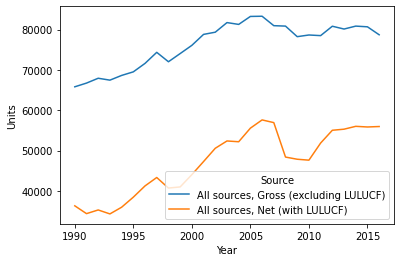

In [17]:
summary = dat.query("Gas == 'All gases' & Source.isin(['All sources, Net (with LULUCF)', 'All sources, Gross (excluding LULUCF)'])")
summary.Source = summary.Source.cat.remove_unused_categories()
sns.lineplot(data=summary, x='Year', y='Units', hue='Source')

In [5]:
reg = smf.ols('Units ~ Year', data=summary).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Units   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     94.88
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           5.44e-10
Time:                        22:39:15   Log-Likelihood:                -259.22
No. Observations:                  27   AIC:                             522.4
Df Residuals:                      25   BIC:                             525.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.744e+06   1.84e+05     -9.484      0.0